In [14]:
import pandas as pd
import ast
from IPython.display import display
from pymongo import MongoClient, errors
import dotenv
import os
import logging
import sys
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import bson
from utils.dbapi import DBapi

dotenv.load_dotenv()
logging.basicConfig(level=logging.INFO)

Index([
       
       'recipe_id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens',

       'techniques', 'calorie_level', 'ingredient_ids', 'name', 'minutes',

       'contributor_id', 'submitted', 'tags', 'nutrition', 'steps', 'n_steps',

       'description', 'ingredients', 'n_ingredients', 'review', 'date',

       'user_id', 'rating', 'cleaned_description', 'cleaned_name',

       'ingredients_processed', 'ingredients_replaced'],
       
      dtype='object')

In [15]:
Index = ['recipe_id', 'techniques', 'minutes', 'contributor_id', 'submitted',
       'steps', 'n_steps', 'review', 'date', 'user_id', 'rating',
       'cleaned_description', 'cleaned_name', 'ingredients_replaced']

print(Index)
print(f'{Index[0]}')

['recipe_id', 'techniques', 'minutes', 'contributor_id', 'submitted', 'steps', 'n_steps', 'review', 'date', 'user_id', 'rating', 'cleaned_description', 'cleaned_name', 'ingredients_replaced']
recipe_id


In [16]:
df = pd.DataFrame()
df.head()

""


In [9]:
db_api = DBapi()
with db_api:
    result = db_api.get_all_from('recipe_id')
    df_temp = pd.DataFrame(result)
    print(df_temp.head())

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:177429 documents trouvés pour recipe_id avec 'recipe_id'.
INFO:root:Connexion à la base de données fermée.


   recipe_id
0         53
1         66
2         84
3         85
4         92


In [18]:
client_DB = DBapi()
with client_DB:
    df_1 = client_DB.get_all_from('recipe_id')
    df_2 = client_DB.get_all_from('date')
    df_3 = client_DB.get_all_from('rating')
    df_1 = pd.DataFrame(df_1)
    df_2 = pd.DataFrame(df_2)
    df_3 = pd.DataFrame(df_3)

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:177429 documents trouvés pour recipe_id avec 'recipe_id'.
INFO:root:177429 documents trouvés pour date avec 'recipe_id'.
INFO:root:177429 documents trouvés pour rating avec 'recipe_id'.
INFO:root:Connexion à la base de données fermée.


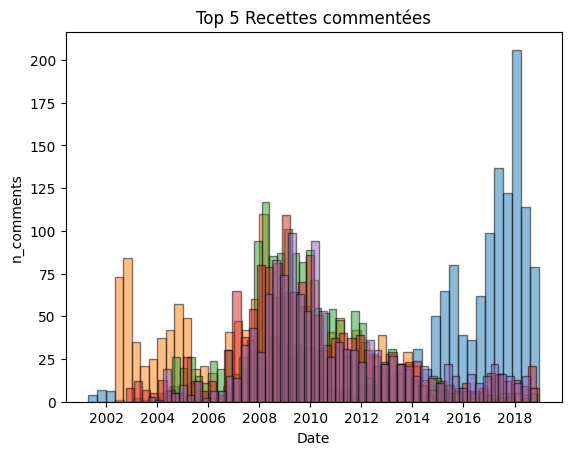

In [ ]:
top_com_df = pd.merge(df_1, df_2, on='recipe_id')
top_com_df = pd.merge(top_com_df, df_3, on='recipe_id')

# nombre de recettes par années
# top_com_df = client_DB.find_by_columns(
#     ["recipe_id", "date", "rating"]
# )top_com_df = pd.merge(df_1, df_2, on='recipe_id')
top_com_df = pd.merge(top_com_df, df_3, on='recipe_id')

# nombre de recettes par années
# top_com_df = client_DB.find_by_columns(
#     ["recipe_id", "date", "rating"]
# )
top_com_df["rating"] = top_com_df["rating"].apply(
    lambda x: ast.literal_eval(x)
)
top_com_df["rating_count"] = top_com_df["rating"].apply(
    len
)
top_com_df["rating_mean"] = top_com_df["rating"].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else 0
)

n_largest = top_com_df.nlargest(5, 'rating_count')

top_com_df["date"] = top_com_df["date"].apply(lambda x: [pd.to_datetime(date) for date in x])

for i in range(len(n_largest)):
    plt.hist(top_com_df.loc[n_largest.index[i]]['date'], bins=50, edgecolor='black', alpha=0.5)

plt.title('Top 5 Recettes commentées')
plt.xlabel('Date')
plt.ylabel('n_comments')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
top_com_df["rating"] = top_com_df["rating"].apply(
    lambda x: ast.literal_eval(x)
)
top_com_df["rating_count"] = top_com_df["rating"].apply(
    len
)
top_com_df["rating_mean"] = top_com_df["rating"].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else 0
)

n_largest = top_com_df.nlargest(5, 'rating_count')

top_com_df["date"] = top_com_df["date"].apply(lambda x: [pd.to_datetime(date) for date in x])

for i in range(len(n_largest)):
    plt.hist(top_com_df.loc[n_largest.index[i]]['date'], bins=50, edgecolor='black', alpha=0.5)

plt.title('Top 5 Recettes commentées')
plt.xlabel('Date')
plt.ylabel('n_comments')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [ ]:
df_g = df.copy()
df_g['rating'] = df_g['rating'].apply(lambda x: ast.literal_eval(str(x)))

In [63]:
df_g.head()
# Analyse des reviews
print(len(df_g['rating'][0]))
print(df_g['rating'][0])
print(len(df_g['rating'][1]))
print(df_g['rating'][1])

1
[3]
19
[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
df_g['rating_count'] = df_g['rating'].apply(len)
top_5_recipes = df_g.sort_values(by='rating_count', ascending=False).head(5)
print(top_5_recipes[['submitted','recipe_id', 'rating_count','cleaned_name']])


TypeError: object of type 'float' has no len()

In [84]:
print(top_5_recipes['rating'].isna().sum())

0
